<a href="https://colab.research.google.com/github/BishalPoudel149/Learning_git/blob/main/Behavioural_clonning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rslim087a/track


Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 34.68 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [ ]:
!ls track

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D ,Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random


In [ ]:
datadir ='track' 
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  ...     speed
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

In [ ]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()


center  ...     speed
0  center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

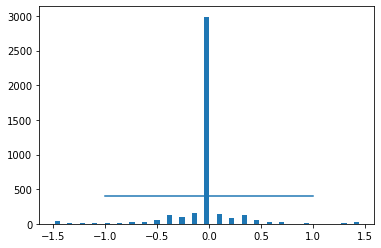

In [ ]:
num_bins=25
samples_per_bin=400
hist,bins=np.histogram(data['steering'],num_bins)
center=bins[:-1]+bins[1:]*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

total_data 4053
removed 2590
remaining: 1463


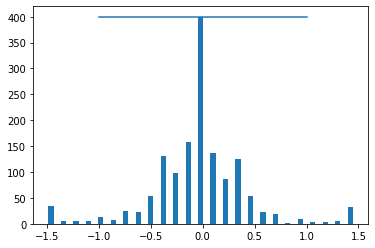

In [ ]:
print('total_data',len(data))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed',len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining:',len(data))

hist,_=np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))


In [ ]:
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_paths=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_paths.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_paths)
  steerings=np.asarray(steering)
  return image_paths,steerings
image_paths,steerings=load_img_steering(datadir+'/IMG',data)



center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0                                 
speed       1.43401                           
Name: 12, dtype: object


In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(image_paths,steerings,test_size=0.2,random_state=6)
print('Training samples:{}\nValid Samples:{}'.format(len(x_train),len(x_valid)))

Training samples:1170
Valid Samples:293


Text(0.5, 1.0, 'validation set')

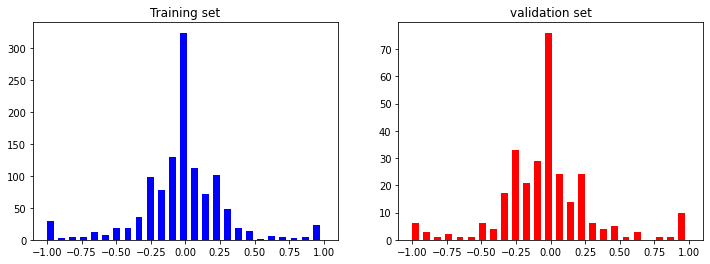

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid ,bins=num_bins, width=0.05,color='red')
axes[1].set_title('validation set')


In [ ]:
def zoom(image):
  zoom=iaa.Affine(scale=(1, 1.3))
  image=zoom.augment_image(image)
  return image
  

Text(0.5, 1.0, 'Zoomed Image')

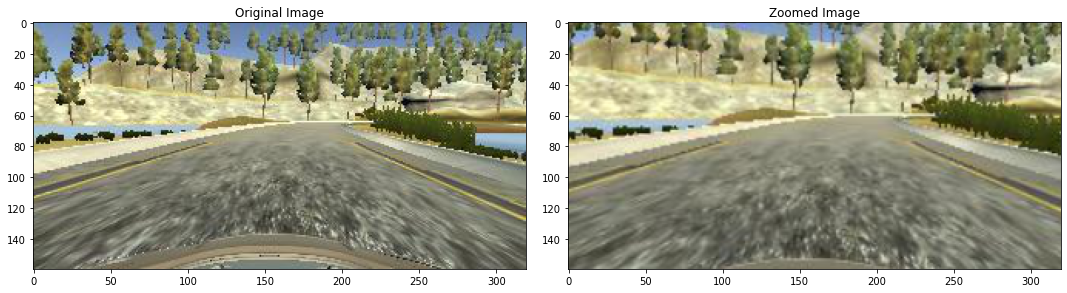

In [ ]:
image =image_paths[random.randint(0,1000)]
original_image= mpimg.imread(image)
zoomed_image=zoom(original_image)

fig,axs=plt.subplots(1 ,2,figsize=(15 ,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [ ]:
def pan(image):
  pan=iaa.Affine(translate_percent={"x" :(-0.1,0.1), "y": (-0.1, 0.1)} )
  image=pan.augment_image(image)
  return image


Text(0.5, 1.0, 'panned Image')

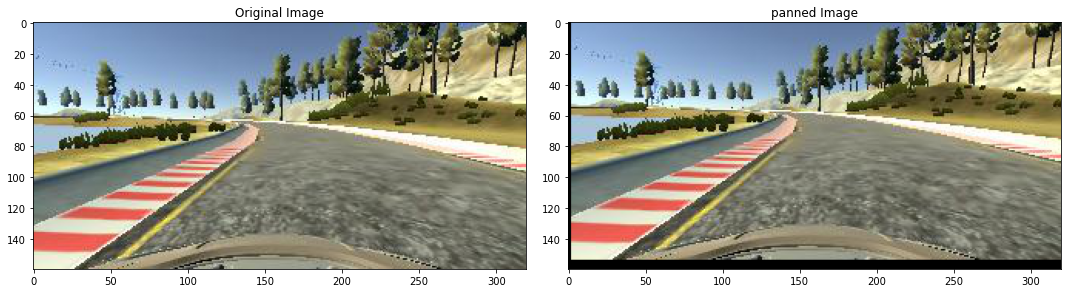

In [ ]:
image =image_paths[random.randint(0,1000)]
original_image= mpimg.imread(image)
panned_image=pan(original_image)

fig,axs=plt.subplots(1 ,2,figsize=(15 ,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('panned Image')

In [ ]:
#third augmentation image
#playing with the brightness of the image darkker or brighter
def img_random_brightness(image):
  brightness=iaa.Multiply((0.2, 1.2 ))
  image=brightness.augment_image(image)
  return image



Text(0.5, 1.0, 'Brightness altered image')

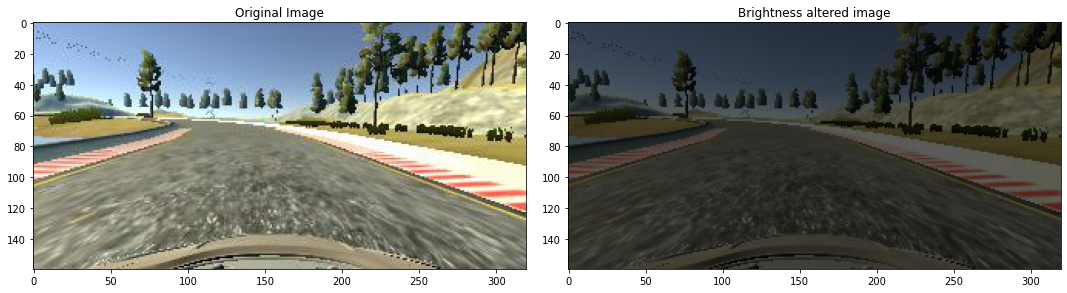

In [ ]:
image =image_paths[random.randint(0,1000)]
original_image= mpimg.imread(image)
br=img_random_brightness(original_image)

fig,axs=plt.subplots(1 ,2,figsize=(15 ,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(br)
axs[1].set_title('Brightness altered image')


In [ ]:
#flipping 
def img_random_flip(image,steering_angle):
  image=cv2.flip(image, 1)
  steering_angle=-steering_angle
  return image,steering_angle

Text(0.5, 1.0, 'flipped image Steering Angle0.21398989999999998')

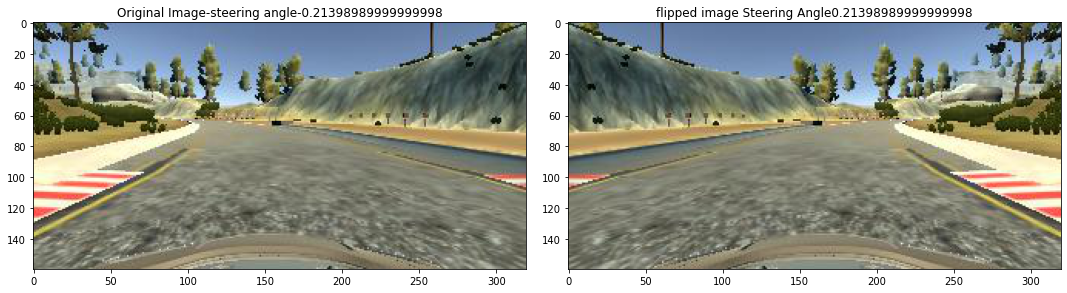

In [ ]:
random_index =random.randint(0,1000)
image= image_paths[random_index]
steering_angle=steerings[random_index]

original_image=mpimg.imread(image)
flipped_image,flipped_steering_angle=img_random_flip(original_image,steering_angle)

fig,axs=plt.subplots(1 ,2,figsize=(15 ,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image-'+'steering angle'+str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('flipped image '+ 'Steering Angle' + str(flipped_steering_angle))

In [ ]:
#Augmentation is being provided randomly to the particular image 
def random_augment(image, steering_angle):
  image=mpimg.imread(image)

  if np.random.rand() < 0.5:
    image=pan(image)
  if np.random.rand() < 0.5:
    image=img_random_brightness(image)
  if np.random.rand() < 0.5:
    image=zoom(image)
  if np.random.rand() < 0.5:
    image,steering_angle=img_random_flip(image,steering_angle)

  return image,steering_angle






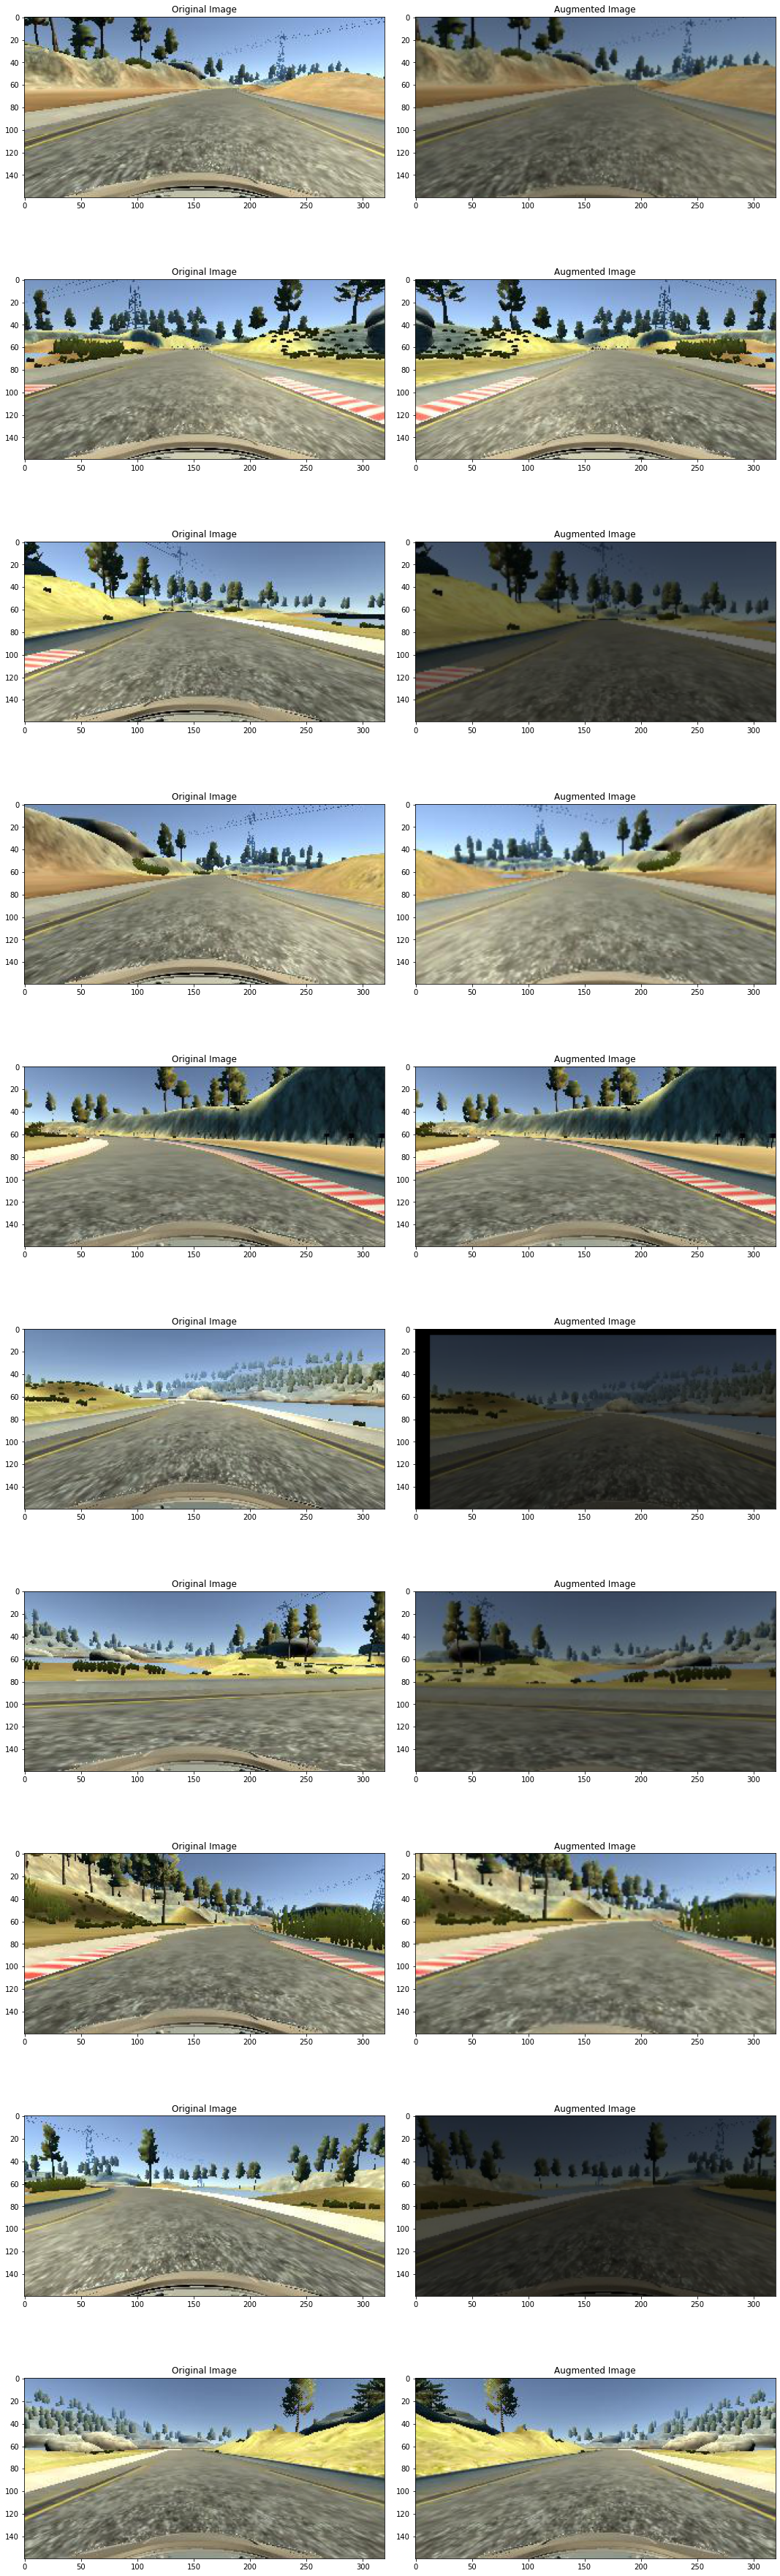

In [ ]:
ncol=2
nrow=10

fig,axs=plt.subplots(nrow,ncol, figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering =steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image ,steering = random_augment(random_image , random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title('Original Image')

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title('Augmented Image')



In [ ]:
def img_preprocess(img):
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255  #no visua, impact of normalization
  return img



Text(0.5, 1.0, 'PreProcessed image')

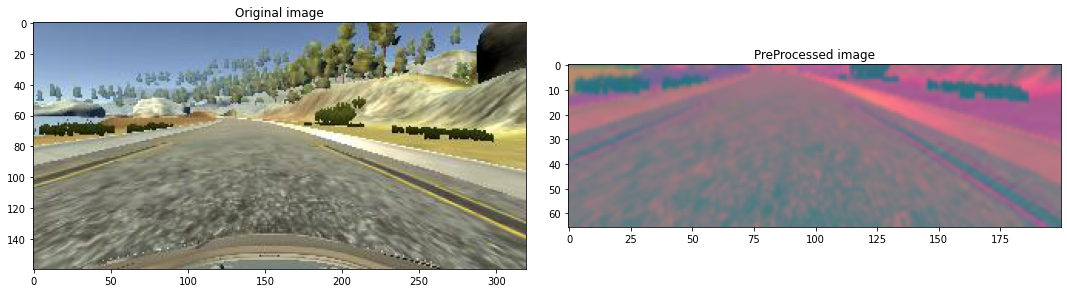

In [ ]:
image=image_paths[100]
original_image=mpimg.imread(image)
preprocessed_image=img_preprocess(original_image)

fig,axs=plt.subplots(1,2 , figsize=(15 ,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('PreProcessed image')


In [ ]:
def batch_generator(image_paths, steering_ang, batch_size  ,istraining):
  
  while True:
    batch_img = []
    batch_steering =[]
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) -1)
      
      if istraining:
       im,steering= random_augment(image_paths[random_index],steering_ang[random_index])
      
      else:
        im=mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im=img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray(batch_img), np.asarray(batch_steering))





Text(0.5, 1.0, 'validation')

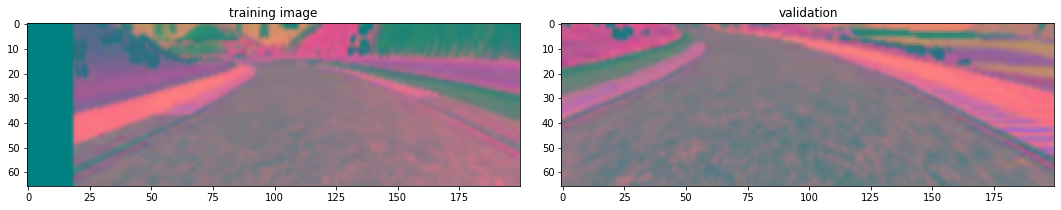

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(x_train , y_train, 1,1))
x_valid_gen, y_valid_gen = next(batch_generator(x_valid , y_valid, 1,0))


fig,axs=plt.subplots(1 ,2,figsize=(15 ,10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('training image') 

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('validation')




In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (3,3), activation='elu'))
  
  model.add(Conv2D(64, (3,3), activation='elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  
  model.add(Dense(50, activation = 'elu'))
  
  model.add(Dense(10, activation = 'elu'))

  model.add(Dense(1))
  
  optimizer = Adam(learning_rate=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model
model = nvidia_model()
print(model.summary())





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
history= model.fit_generator(batch_generator(x_train,y_train,100, 1),
                             steps_per_epoch=300,
                             epochs = 10,  
                             validation_data =batch_generator(x_valid ,y_valid,100,0),
                             validation_steps=200,
                             verbose=1,
                             shuffle=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 429s 1s/step - loss: 0.0853 - val_loss: 0.0646
Epoch 2/10
300/300 [==============================] - 430s 1s/step - loss: 0.0667 - val_loss: 0.0582
Epoch 3/10
300/300 [==============================] - 429s 1s/step - loss: 0.0647 - val_loss: 0.0581
Epoch 4/10
300/300 [==============================] - 429s 1s/step - loss: 0.0617 - val_loss: 0.0549
Epoch 5/10
300/300 [==============================] - 427s 1s/step - loss: 0.0597 - val_loss: 0.0529
Epoch 6/10
300/300 [==============================] - 424s 1s/step - loss: 0.0560 - val_loss: 0.0501
Epoch 7/10
300/300 [==============================] - 423s 1s/step - loss: 0.0541 - val_loss: 0.0427
Epoch 8/10
300/300 [==============================] - 428s 1s/step - loss: 0.0525 - val_loss: 0.0407
Epoch 9/10
300/300 [==============================] - 429s 1s/step - loss: 0.0501 - val_loss: 0.0415
Epoch 10/10
300/300 [==============================] - 427s 1s/step - loss: 0.0485 - val_lo

Text(0.5, 0, 'Epoch')

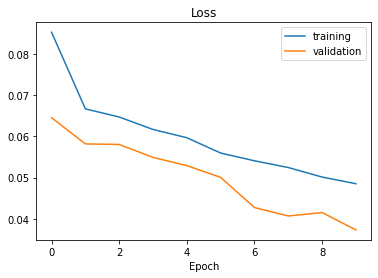

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')




In [ ]:
#to use this model in our self driving car simulator we have to save it
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>